In [ ]:
import numpy as np
import pandas as pd
import warnings
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, r2_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler



# Data Load and Initial Exploration

Importing the data and doing some initial exploration.

In [2]:
db = pd.read_csv("movie_metadata.csv")

In [3]:
db.sample(10)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,classify
1655,Color,Martin Brest,77.0,126.0,102.0,497.0,Yaphet Kotto,22000.0,38413606.0,Action|Comedy|Crime|Thriller,...,English,USA,R,30000000.0,1988.0,581.0,7.6,1.85,0,Hit
2949,Color,Chris Rock,161.0,102.0,0.0,555.0,Romany Malco,3000.0,25277561.0,Comedy|Romance,...,English,USA,R,12000000.0,2014.0,966.0,6.5,2.35,0,Hit
3564,Color,Louis Morneau,97.0,91.0,38.0,91.0,Bob Gunton,730.0,10149779.0,Horror|Sci-Fi|Thriller,...,English,USA,PG-13,6500000.0,1999.0,461.0,3.6,2.35,342,Average
1804,Color,Callie Khouri,93.0,116.0,144.0,477.0,Fionnula Flanagan,1000.0,69586544.0,Drama,...,English,USA,PG-13,27000000.0,2002.0,482.0,6.0,2.35,0,Average
1990,Color,John Guillermin,21.0,117.0,71.0,42.0,Donovan Scott,433.0,NaN,Adventure|Fantasy,...,English,UK,PG,25000000.0,1984.0,54.0,4.8,2.35,739,Average
2691,Color,Brian Koppelman,57.0,92.0,34.0,366.0,Tom Noonan,14000.0,11632420.0,Crime|Drama|Thriller,...,English,USA,R,NaN,2001.0,442.0,6.1,2.35,566,Hit
4515,Color,Rob McKittrick,91.0,94.0,6.0,804.0,Dane Cook,16000.0,16101109.0,Comedy,...,English,USA,R,3000000.0,2005.0,1000.0,6.8,1.85,0,Hit
489,Color,Lucile Hadzihalilovic,63.0,81.0,92.0,8.0,Roxane Duran,23.0,NaN,Drama|Horror|Mystery|Sci-Fi,...,French,France,NaN,NaN,2015.0,21.0,6.4,2.35,257,Hit
2363,Color,Robert Zemeckis,198.0,116.0,0.0,459.0,Thomas F. Wilson,1000.0,210609762.0,Adventure|Comedy|Sci-Fi,...,English,USA,PG,19000000.0,1985.0,690.0,8.5,1.18,39000,Hit
565,Color,Brian De Palma,117.0,98.0,0.0,697.0,Mike Starr,12000.0,55585389.0,Crime|Mystery|Thriller,...,English,USA,R,69000000.0,1998.0,854.0,5.9,2.35,880,Average


In [4]:
db.info() # It is observed that data is mixed of dtypes of object, float64 and int64 and there are numbers of missing values. We have 27 columns (features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [5]:
db.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


In [6]:
dupes = db.duplicated() # Shows the number of duplicate entries in data
print(f"Total number of duplicates are : {sum(dupes)}")

Total number of duplicates are : 45


                   Column  Missing_count  Missing_percentage
                    color             19                0.38
            director_name            104                2.06
   num_critic_for_reviews             50                0.99
                 duration             15                0.30
  director_facebook_likes            104                2.06
   actor_3_facebook_likes             23                0.46
             actor_2_name             13                0.26
   actor_1_facebook_likes              7                0.14
                    gross            884               17.53
                   genres              0                0.00
             actor_1_name              7                0.14
              movie_title              0                0.00
          num_voted_users              0                0.00
cast_total_facebook_likes              0                0.00
             actor_3_name             23                0.46
     facenumber_in_poste

<BarContainer object of 29 artists>

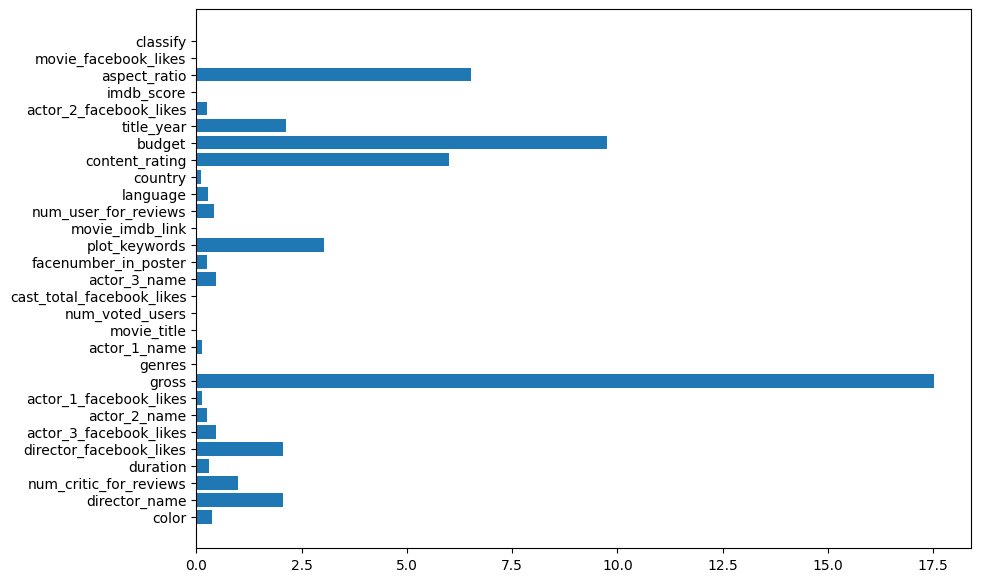

In [7]:
missing_data = pd.DataFrame({
    'Column': db.columns,
    'Missing_count': db.isnull().sum().values,
    'Missing_percentage': (db.isnull().mean()*100).round(2)})

print(missing_data.to_string(index=False)) #Shown number and percentage of duplicate in data columns

plt.figure(figsize=(10,7))
missing_cols = missing_data['Column'].values
missing_pct = missing_data["Missing_percentage"].values
plt.barh(missing_cols, missing_pct)

In [8]:
db.nunique()

color                           2
director_name                2398
num_critic_for_reviews        528
duration                      191
director_facebook_likes       435
actor_3_facebook_likes        906
actor_2_name                 3032
actor_1_facebook_likes        878
gross                        4035
genres                        914
actor_1_name                 2097
movie_title                  4917
num_voted_users              4826
cast_total_facebook_likes    3978
actor_3_name                 3521
facenumber_in_poster           19
plot_keywords                4760
movie_imdb_link              4919
num_user_for_reviews          954
language                       46
country                        65
content_rating                 18
budget                        439
title_year                     91
actor_2_facebook_likes        917
imdb_score                     78
aspect_ratio                   22
movie_facebook_likes          876
classify                        3
dtype: int64

# Understanding Each Attribute

- movie_title - Title of the Movie (Not important)
- duration - Duration in minutes 
- director_name	- Name of the Director of the Movie (Not important)
- director_facebook_likes - Number of likes of the Director on his Facebook Page (Not important)
- actor_1_name - Primary actor starring in the movie (Not important)
- actor_1_facebook_likes - Number of likes of the Actor_1 on his/her Facebook Page
- actor_2_name - Other actor starring in the movie (Not important)
- actor_2_facebook_likes - Number of likes of the Actor_2 on his/her Facebook Page
- actor_3_name - Other actor starring in the movie (Not important)
- actor_3_facebook_likes - Number of likes of the Actor_3 on his/her Facebook Page
- num_user_for_reviews - Number of users who gave a review
- num_critic_for_reviews - Number of critical reviews on imdb
- num_voted_users - Number of people who voted for the movie
- cast_total_facebook_likes - Total number of facebook likes of the entire cast of the movie
- movie_facebook_likes - Number of Facebook likes in the movie page
- plot_keywords - Keywords describing the movie plot (Not important)
- facenumber_in_poster - Number of the actor who featured in the movie poster
- color - Film colorization. ‘Black and White’ or ‘Color’
- genres - Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’ (This columns will get corrected through seperating the genres in columns in pre processing.)
- title_year - The year in which the movie is released (1916:2016)
- language - English, Arabic, Chinese, French, German, Danish, Italian, Japanese etc
- country - Country where the movie is produced
- content_rating - Content rating of the movie
- aspect_ratio - Aspect ratio the movie was made in
- movie_imdb_link - IMDB link of the movie (Not important)
- gross - Gross earnings of the movie in Dollars
- budget - Budget of the movie in Dollars
- imdb_score - IMDB Score of the movie on IMDB (Target Variable will be used as Categorical - Flop, Average, Hit)


### Project  Goal ###

The purpose of this project is to make a model which can learn the pattern of these data by training on this dataset. By utilizing the model, model can predict movie success categories.

According to "imdb.com", the movie which makes gross more than 10 - 20% more than there budget are considered under Hit movie. The movies where gross barely crosses the budget considered under Average. Rest are considered under Flop.

source: https://pro.imdb.com/content/article/entertainment-industry-resources/featured-articles/how-is-the-success-of-films-and-tv-shows-measured/GLFTC8ZLBBUSNTM3

But due to guidelines of the project we are given to categorize the movie based on the IMDB score ranges..
Due to which this IMDB score variable will be the most important variable for prediction and may lead the model to overfitting.

As per the guidelines we are following.....


## Exploratory Data Analysis (EDA)


### Analysis

Before starting the analysis, I want to note that the dataset contains a *genres* feature where multiple genres are listed in a single column.  
During exploration, I found that there are up to 10 genre types, with 914 unique combinations.  
Since this format may be difficult for the model to interpret, I split the feature into separate columns.

From here, we will analyze the relationship between genres and imdb scores.

*Note - Bifurcation was done in excel csv which will be now loaded from here on.

In [9]:
""" Pre bifurcation

    genres

    Action | Sci-fi | Comedy

    Post bifurcation

    genre_type1      genre_type2     genre_type3     genre_type4

    Action           Sci-fi          Comedy          None          """

' Pre bifurcation\n\n    genres\n\n    Action | Sci-fi | Comedy\n\n    Post bifurcation\n\n    genre_type1      genre_type2     genre_type3     genre_type4\n\n    Action           Sci-fi          Comedy          None          '

In [10]:
db = pd.read_csv("movie_metadata_master.csv")
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genre_type1                5043 non-null   object 
 10  genre_type2                4410 non-null   object 
 11  genre_type3                3055 non-null   object 
 12  genre_type4                1427 non-null   object 
 13  genre_type5                446 non-null    objec

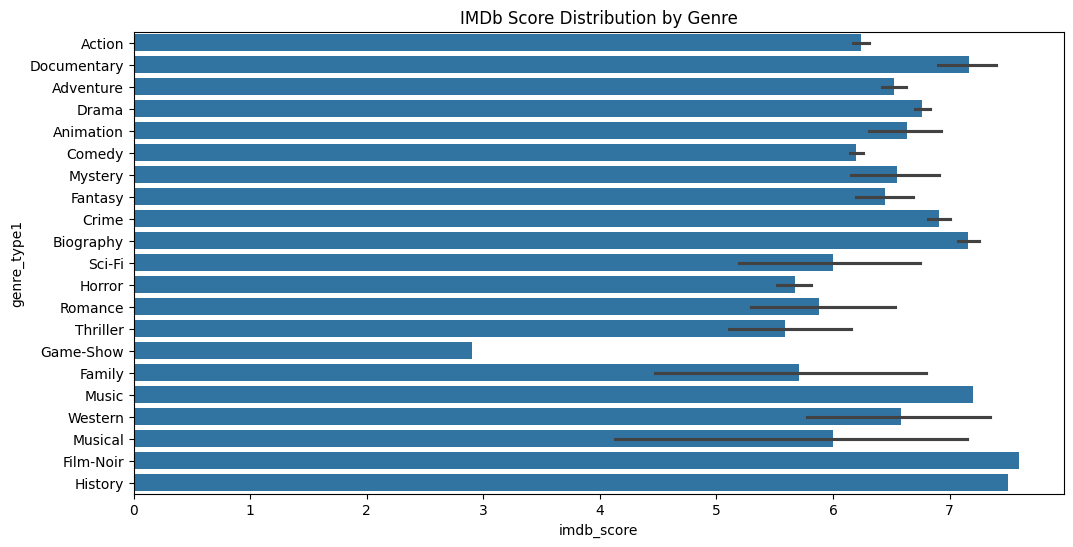

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(y ='genre_type1', x ='imdb_score', data=db)
plt.title('IMDb Score Distribution by Genre')
plt.show()

Relation of imdb_score and genres.....


### Creating Movie Success Categories

classify
Hit        3458
Average    1539
Flop         46
Name: count, dtype: int64
classify
Hit        68.57
Average    30.52
Flop        0.91
Name: count, dtype: float64


<Axes: xlabel='classify'>

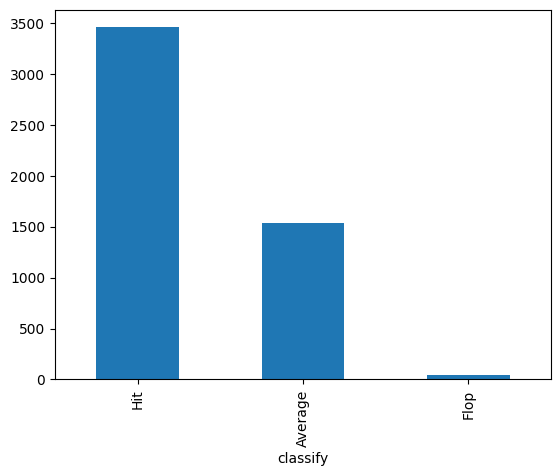

In [12]:
# Creating "Classify" column based on imdb_score.
def classify_movie(score):
    if score >= 1 and score <= 3:
        return "Flop"
    elif score >= 3 and score <= 6:
        return "Average"
    else:
        return "Hit"
    
db["classify"] = db['imdb_score'].apply(classify_movie)

category_counts = db['classify'].value_counts()
print(category_counts)
print((category_counts/len(db)*100).round(2))

category_counts.plot(kind="bar")

Movie success category distribution is as per the above chart post classifying the imdb_score.

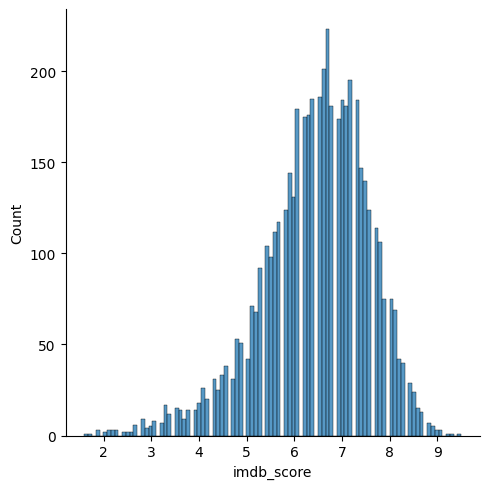

In [13]:
sns.displot(db["imdb_score"], bins =100) #This plot shows the number of movies counts has been scored average.

### Analysis 1 

Relation between imdb_score and gross

<Figure size 2000x1000 with 0 Axes>

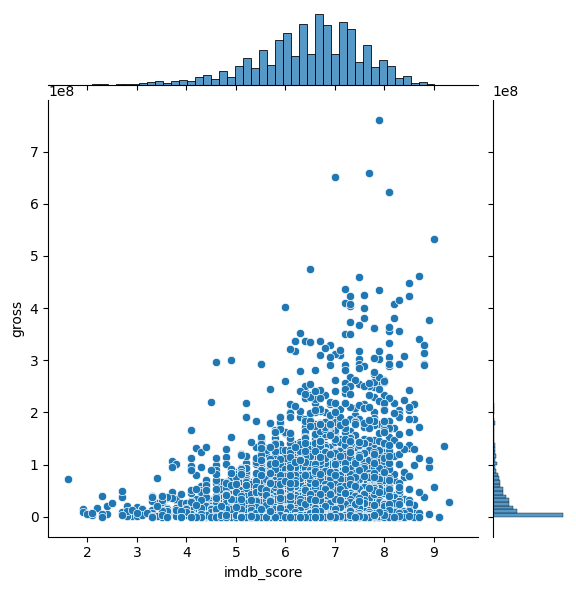

In [14]:
plt.figure(figsize=(20,10))
sns.jointplot(x = "imdb_score",y = "gross",data=db)
plt.show()

In the above scatter we can see the that in most cases when the gross increases imdb_score also increases. By considering gross as factor we can determine whether the movie will be hit, average or flop.

### Analysis 2 

Relation between num_voted_user and imdb_score


<Figure size 1000x500 with 0 Axes>

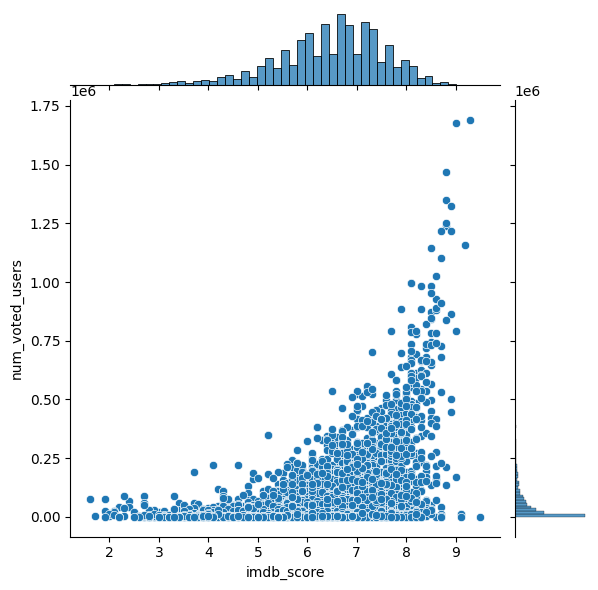

In [15]:
plt.figure(figsize=(10,5))
sns.jointplot(y = "num_voted_users", x = "imdb_score", data = db)

In above plot we can clearly see that when the voted user number are increasing imdb_score is also increasing. This variable is most important feature to predict imdb_score.

### Analysis 3

Relation between all numerical attributes.

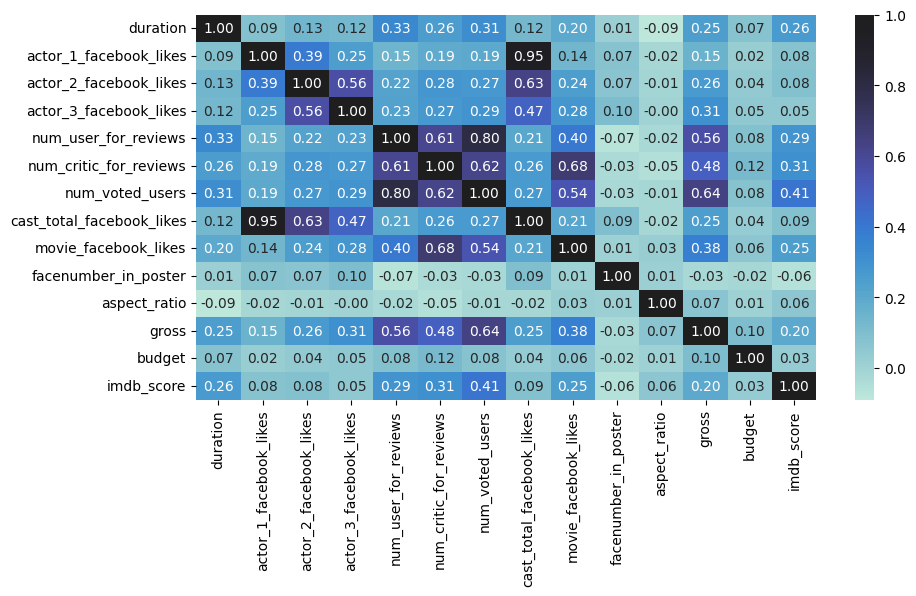

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(db[["duration", "actor_1_facebook_likes","actor_2_facebook_likes","actor_3_facebook_likes","num_user_for_reviews","num_critic_for_reviews","num_voted_users","cast_total_facebook_likes","movie_facebook_likes","facenumber_in_poster","aspect_ratio","gross","budget","imdb_score"]].corr(), annot=True, fmt=".2f",center=1)
plt.show()

The strong and positive correlation between num_user_reviews, num_critic_reviews and num_voted_users. The relation of gross, movie_facebook_likes and duration are also can be correlation with imdb_score.

# Data Preprocessing


### Handling Missing Value

In [17]:
db_pro = db.copy() # Created a copy for pre processing

columns_to_drop = ['movie_title','director_name','actor_1_name','actor_2_name','actor_3_name','plot_keywords','movie_imdb_link'] # We dropping the some columns which have not that much of use in data modeling.
db_pro = db_pro.drop(columns=columns_to_drop)

print(f'Dataset shape after dropping the some columns: {db_pro.shape}')


Dataset shape after dropping the some columns: (5043, 29)


In [18]:
# Seperating features and target

X = db_pro.drop('classify', axis=1)
y = db_pro['classify']

print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (5043, 28)
Target shape: (5043,)


In [19]:
# Identifying numerical and categorical columns

numerical_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

In [20]:
# Handling missing values in numerical columns - using median imputation

num_imputer = SimpleImputer(strategy='median')
X[numerical_cols] = num_imputer.fit_transform(X[numerical_cols])


# Handling missing values in categorical columns - using most frequent values

cat_impute = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = cat_impute.fit_transform(X[categorical_cols])

print(X.isnull().sum())

color                        0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
genre_type1                  0
genre_type2                  0
genre_type3                  0
genre_type4                  0
genre_type5                  0
genre_type6                  0
genre_type7                  0
genre_type8                  0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64


### Encoding Categorical Values


In [21]:
# Label encode categorical variables
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

    
X.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genre_type1,genre_type2,genre_type3,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,1,723.0,178.0,0.0,855.0,1000.0,760505847.0,0,0,7,...,3054.0,11,62,7,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,0,0,7,...,1238.0,11,62,7,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,1,602.0,148.0,0.0,161.0,11000.0,200074175.0,0,0,20,...,994.0,11,61,7,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,1,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,0,21,20,...,2701.0,11,62,7,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,1,110.0,103.0,131.0,371.5,131.0,25517500.0,6,6,20,...,156.0,11,62,9,20000000.0,2005.0,12.0,7.1,2.35,0.0


In [22]:
# Encoding Target variable

target_encoder = LabelEncoder()
y_enc = target_encoder.fit_transform(y)

for idx, label in enumerate(target_encoder.classes_):
    print(f'{label}: {idx}')

Average: 0
Flop: 1
Hit: 2


### Check for Multicollinearity

As per the project guidelines we have to check calculate correlation matrix for all features and find highly correlated features i.e, (>0.90). Will romove those features from each highly correlated pair.


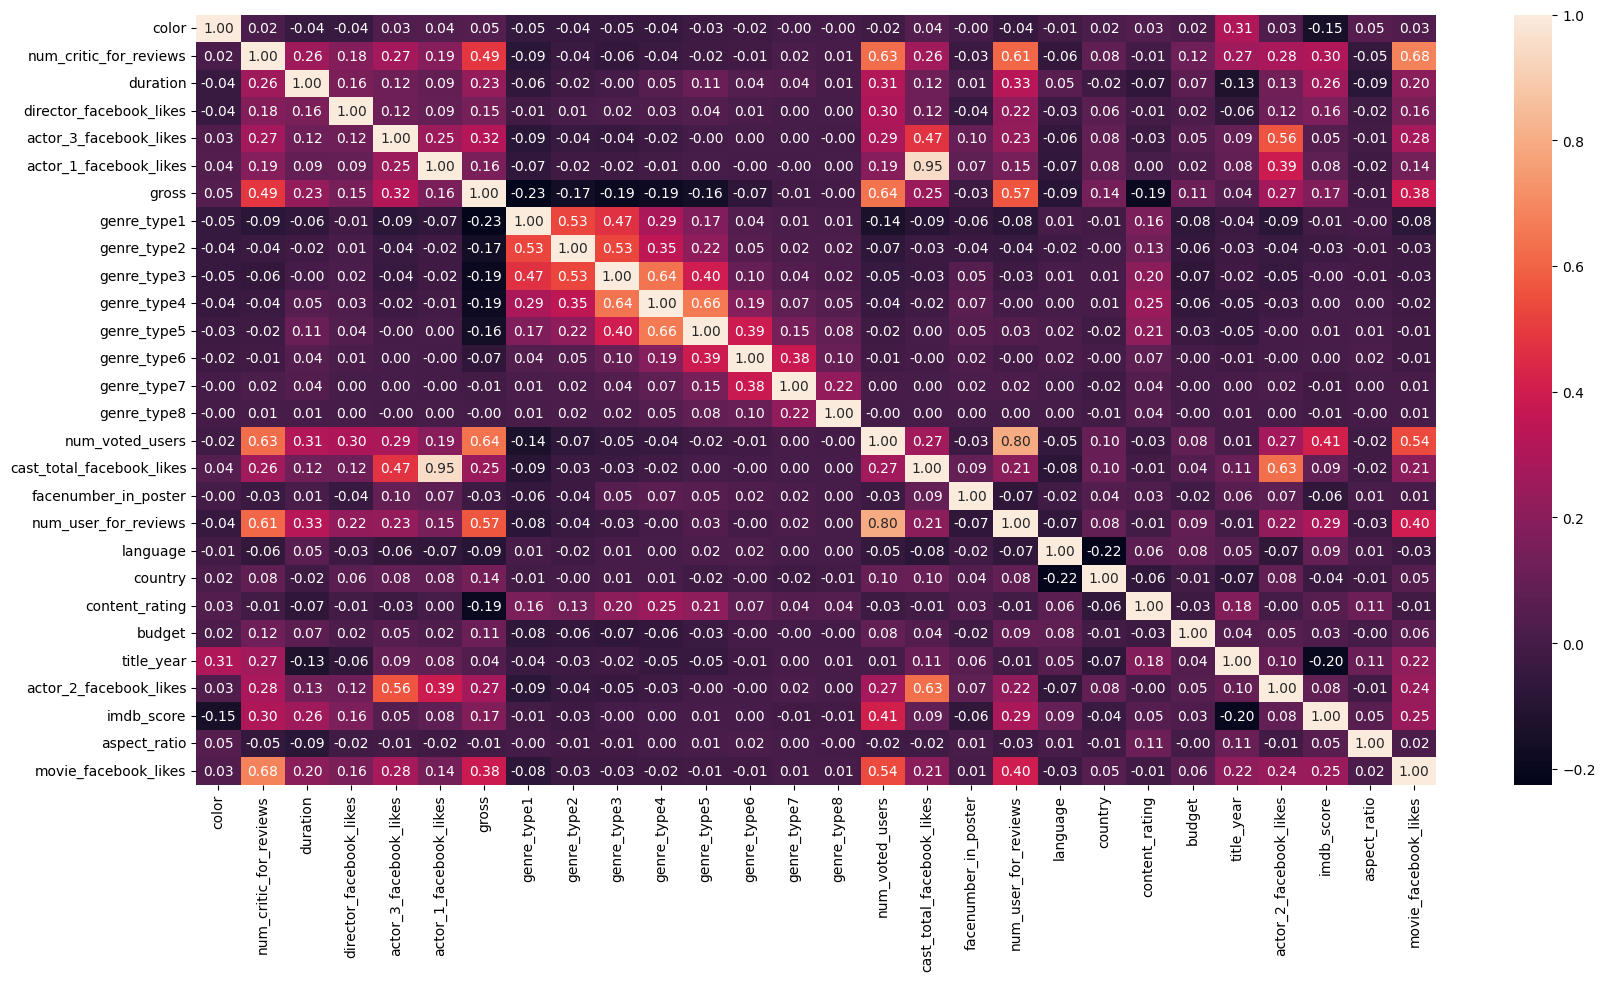

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(),annot=True, fmt=".2f")
plt.show()

From the above heatmap we found out that the highly correlated pair is only 1 i.e, actor_1_facebook_likes to cast_total_facebook_likes. So next step will be to remove the one feature from it which i would select to remove the actor_1_facebook_likes.


In [24]:
# Removing to address multicollinearity

feature_to_remove = ['actor_1_facebook_likes','imdb_score']
X = X.drop(columns=feature_to_remove)
print(f'Data shape after removing correlated feature: {X.shape}')


Data shape after removing correlated feature: (5043, 26)


### Feature Scaling and Train-Test-Split


In [25]:
# Spliting the data into Training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc,
    test_size=0.2,
    random_state=42,
    stratify = y_enc)

print(f'Training set size: {X_train.shape}')
print(f'Testing set size: {X_test.shape}')

Training set size: (4034, 26)
Testing set size: (1009, 26)


In [26]:
# Applying feature scaling
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled = scaler.fit_transform(X_train)

print(f'The scaling of features is successfully done:\n{X_test_scaled}')
print(f'The scaling of target variable is successfully done:\n{X_train_scaled}')


The scaling of features is successfully done:
[[ 2.18557529e-01 -4.89976619e-01  4.10439399e-02 ... -4.12172922e-01
  -3.60580243e-01 -3.28866093e-01]
 [ 2.18557529e-01 -9.20043255e-01  5.00264392e-01 ... -2.32586958e-01
  -3.01681579e-01 -3.39251498e-01]
 [ 2.18557529e-01 -1.01928940e+00 -7.03373970e-04 ... -3.24892557e-01
   1.19023169e-01 -3.39526245e-01]
 ...
 [ 2.18557529e-01 -1.10199452e+00 -1.92107981e+00 ... -3.01088821e-01
   1.19023169e-01 -3.69638424e-01]
 [ 2.18557529e-01  4.36320749e-01  1.24538568e-01 ... -3.10874801e-01
   1.19023169e-01 -3.77386266e-01]
 [ 2.18557529e-01 -2.25320228e-01  4.10439399e-02 ... -2.41050508e-01
  -3.01681579e-01 -3.77386266e-01]]
The scaling of target variable is successfully done:
[[ 0.2052023   0.96402823  1.12089458 ...  2.53069877  0.08443719
  -0.39267238]
 [ 0.2052023  -0.67170857  0.25619919 ... -0.38866148  0.08443719
  -0.3752102 ]
 [ 0.2052023   0.11311464 -0.01893117 ... -0.36328635  0.08443719
  -0.03525932]
 ...
 [-4.87323981 -0.

# Model Training And Evaluation

## Logistic Regression


In [27]:
# Training Logistic Regression

from sklearn.linear_model import LogisticRegression

In [28]:
lr_model = LogisticRegression(random_state=42, max_iter=1000000)
lr_model.fit(X_train_scaled, y_train)
lr_model_y_pred = lr_model.predict(X_test_scaled) # Making predictions

# Calculation metrics

lr_accuracy = accuracy_score(y_test, lr_model_y_pred)
lr_precision = precision_score(y_test, lr_model_y_pred, average='weighted')
lr_recall = recall_score(y_test, lr_model_y_pred, average='weighted')
lr_f1 = f1_score(y_test, lr_model_y_pred, average='weighted')


print(f'Accuracy: {lr_accuracy}')
print(f'Precision: {lr_precision}')
print(f'Recall: {lr_recall}')
print(f'F1_score: {lr_f1}')


Accuracy: 0.7195242814667988
Precision: 0.6957283158421259
Recall: 0.7195242814667988
F1_score: 0.7012625095845864


c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Text(0.5, 25.722222222222214, 'Predicted label')

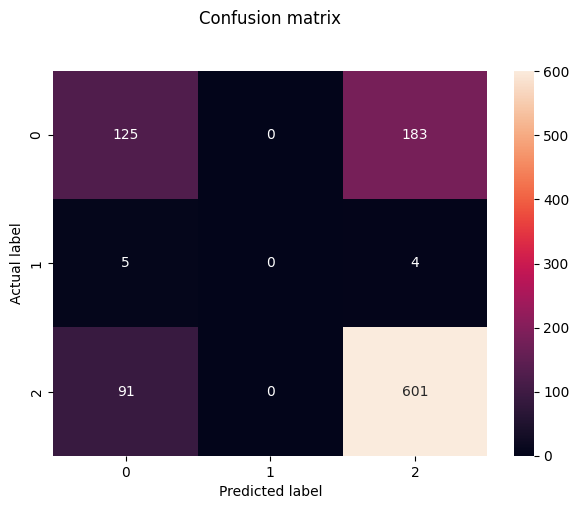

In [29]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, lr_model_y_pred)
Db1_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (7,5))
sns.heatmap(Db1_conf_mat, annot=True, fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Decision Tree

In [30]:
# Training Decision Tree

from sklearn.tree import DecisionTreeClassifier

In [31]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_model_y_pred = dt_model.predict(X_test_scaled) # Making predictions

# Calculation metrics 

dt_accuracy = accuracy_score(y_test, dt_model_y_pred)
dt_precision = precision_score(y_test, dt_model_y_pred, average='weighted')
dt_recall = recall_score(y_test, dt_model_y_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_model_y_pred, average='weighted')


print(f'Accuracy: {dt_accuracy}')
print(f'Precision: {dt_precision}')
print(f'Recall: {dt_recall}')
print(f'F1_score: {dt_f1}')


Accuracy: 0.709613478691774
Precision: 0.699815222081715
Recall: 0.709613478691774
F1_score: 0.703505555265766


Text(0.5, 25.722222222222214, 'Predicted label')

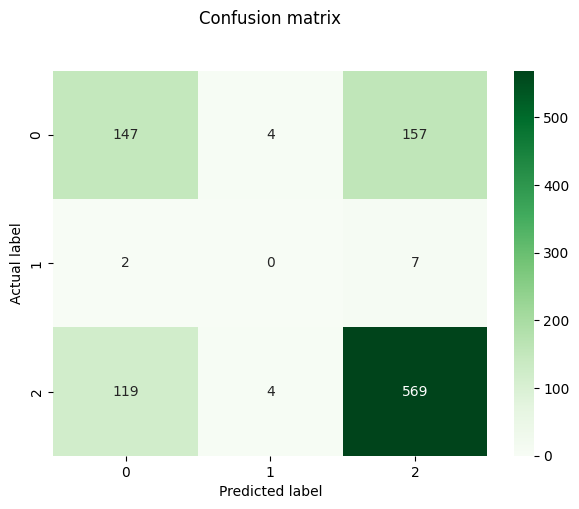

In [32]:
conf_mat = confusion_matrix(y_test, dt_model_y_pred)
Db1_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (7,5))
sns.heatmap(Db1_conf_mat, annot=True,cmap='Greens', fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Random Forest Classifier

In [33]:
# Training Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc_model = RandomForestClassifier(random_state=42)
rfc_model.fit(X_train_scaled, y_train)
rfc_model_y_pred = rfc_model.predict(X_test_scaled) # Making predictions

# Calculation metrics 

rfc_accuracy = accuracy_score(y_test, rfc_model_y_pred)
rfc_precision = precision_score(y_test, rfc_model_y_pred, average='weighted')
rfc_recall = recall_score(y_test, rfc_model_y_pred, average='weighted')
rfc_f1 = f1_score(y_test, rfc_model_y_pred, average='weighted')


print(f'Accuracy: {rfc_accuracy}')
print(f'Precision: {rfc_precision}')
print(f'Recall: {rfc_recall}')
print(f'F1_score: {rfc_f1}')

Accuracy: 0.7581764122893955
Precision: 0.752709209861065
Recall: 0.7581764122893955
F1_score: 0.7223393111651184


c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Text(0.5, 25.722222222222214, 'Predicted label')

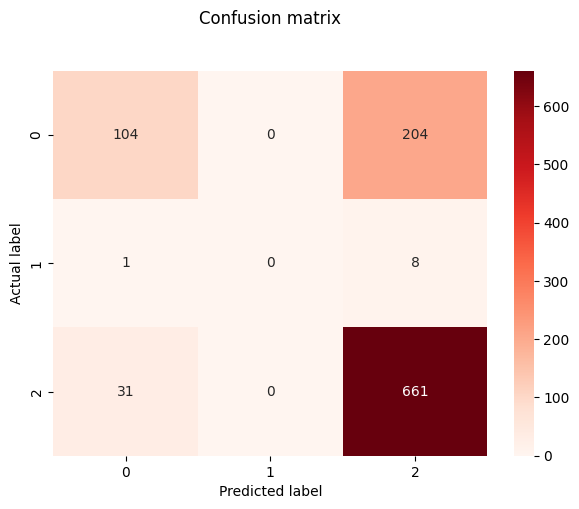

In [35]:
conf_mat = confusion_matrix(y_test, rfc_model_y_pred)
Db1_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (7,5))
sns.heatmap(Db1_conf_mat, annot=True,cmap='Reds', fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Gradient Boosting Classifier


In [36]:
# Training Gradient Boosting Classifier 

from sklearn.ensemble import GradientBoostingClassifier

In [37]:
gbc_model = GradientBoostingClassifier(random_state=42)
gbc_model.fit(X_train_scaled, y_train)
gbc_model_y_pred = gbc_model.predict(X_test_scaled) # Making Predictions

# Calculating Metrics

gbc_accuracy = accuracy_score(y_test, gbc_model_y_pred)
gbc_precision = precision_score(y_test, gbc_model_y_pred, average='weighted')
gbc_recall = recall_score(y_test, gbc_model_y_pred, average='weighted')
gbc_f1 = f1_score(y_test, gbc_model_y_pred, average='weighted')


print(f'Accuracy: {gbc_accuracy}')
print(f'Precision: {gbc_precision}')
print(f'Recall: {gbc_recall}')
print(f'F1_score: {gbc_f1}')

Accuracy: 0.7324083250743311
Precision: 0.7479562447223341
Recall: 0.7324083250743311
F1_score: 0.7215838835046186


Text(0.5, 25.722222222222214, 'Predicted label')

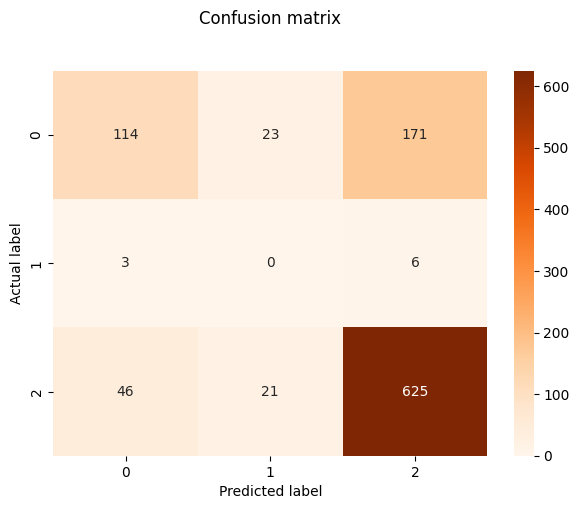

In [38]:
conf_mat = confusion_matrix(y_test, gbc_model_y_pred)
Db1_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (7,5))
sns.heatmap(Db1_conf_mat, annot=True,cmap='Oranges', fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Comparison Model Performance


In [39]:
# Metrics collected from Logistics Regression
lr_result = {
    'Model': "Logistic Regression",
    "Accuracy": lr_accuracy,
    "Precision": lr_precision,
    "Recall": lr_recall,
    "F1-Score": lr_f1
}

# Metrics collected from Decision Tree
dt_result = {
    'Model': "Decision Tree",
    "Accuracy": dt_accuracy,
    "Precision": dt_precision,
    "Recall": dt_recall,
    "F1-Score": dt_f1
}

# Metrics collected from Random Forest Classifier
rfc_result = {
    'Model': "Random Forest Classifier",
    "Accuracy": rfc_accuracy,
    "Precision": rfc_precision,
    "Recall": rfc_recall,
    "F1-Score": rfc_f1
}

# Metrics collected from Gradient Boosting Classifier
gbc_result = {
    'Model': "Gradient Boosting Classifier",
    "Accuracy": gbc_accuracy,
    "Precision": gbc_precision,
    "Recall": gbc_recall,
    "F1-Score": gbc_f1
}

result_df = pd.DataFrame([lr_result,dt_result,rfc_result,gbc_result])
print(result_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0           Logistic Regression  0.719524   0.695728  0.719524  0.701263
1                 Decision Tree  0.709613   0.699815  0.709613  0.703506
2      Random Forest Classifier  0.758176   0.752709  0.758176  0.722339
3  Gradient Boosting Classifier  0.732408   0.747956  0.732408  0.721584


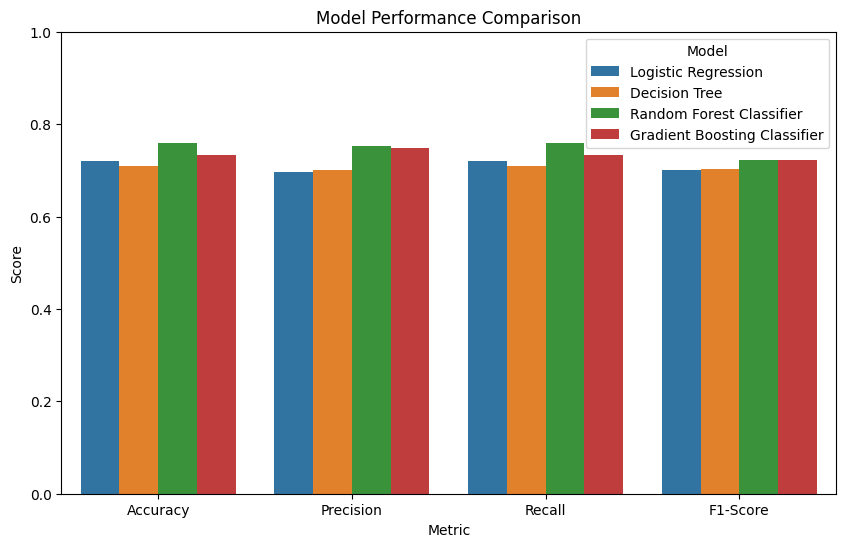

In [40]:
# Visual Comparison

# Melt DataFrame for plotting
result_melted = result_df.melt(id_vars="Model", 
                                 var_name="Metric", 
                                 value_name="Score")

# Plot grouped bar chart
plt.figure(figsize=(10,6))
sns.barplot(x="Metric", y="Score", hue="Model", data=result_melted)
plt.title("Model Performance Comparison")
plt.ylim(0,1)  # scores range between 0 and 1
plt.legend(title="Model")
plt.show()


On basis of the all model comparison. Conclusion was made that model Random Forest Classifier outperforms as compare to other models. Next step will be Detailed analysis of Random Forest Classifier.

According to the guidelines we have to emphasis on Random Forest as demonstrated in the script.

### Deatailed Analysis of Random Forest


In [41]:
print('Classification Report:')
print(classification_report(y_test,rfc_model_y_pred, target_names=target_encoder.classes_, zero_division=False))

Classification Report:
              precision    recall  f1-score   support

     Average       0.76      0.34      0.47       308
        Flop       0.00      0.00      0.00         9
         Hit       0.76      0.96      0.84       692

    accuracy                           0.76      1009
   macro avg       0.51      0.43      0.44      1009
weighted avg       0.75      0.76      0.72      1009



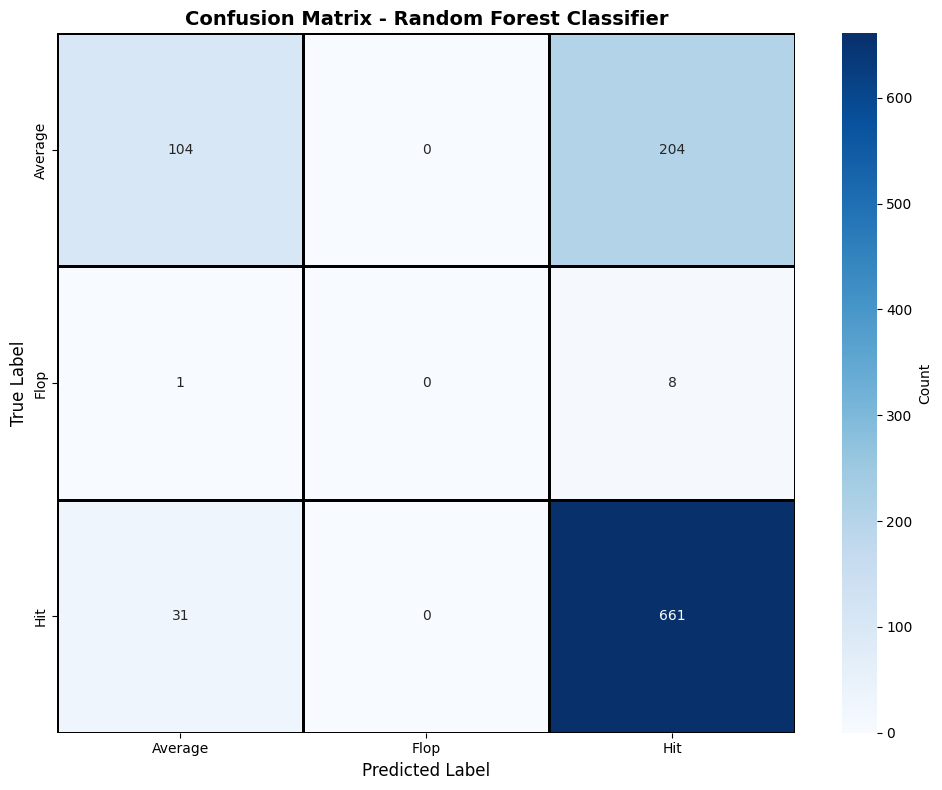

In [42]:
# Confusion Matrix
cm = confusion_matrix(y_test, rfc_model_y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_,
            cbar_kws={'label': 'Count'},
            linewidths=1, linecolor='black')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title(f'Confusion Matrix - Random Forest Classifier', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Top 20 Most Important Features (Random Forest):
                  Feature  Importance
          num_voted_users    0.118230
                 duration    0.093366
                   budget    0.068691
   num_critic_for_reviews    0.068124
                    gross    0.065280
     num_user_for_reviews    0.063742
               title_year    0.062916
cast_total_facebook_likes    0.059650
   actor_3_facebook_likes    0.051150
  director_facebook_likes    0.049478
   actor_2_facebook_likes    0.049406
     movie_facebook_likes    0.046631
              genre_type1    0.043469
              genre_type2    0.035175
              genre_type3    0.024298
     facenumber_in_poster    0.023312
           content_rating    0.022727
                  country    0.016974
             aspect_ratio    0.014396
              genre_type4    0.011970


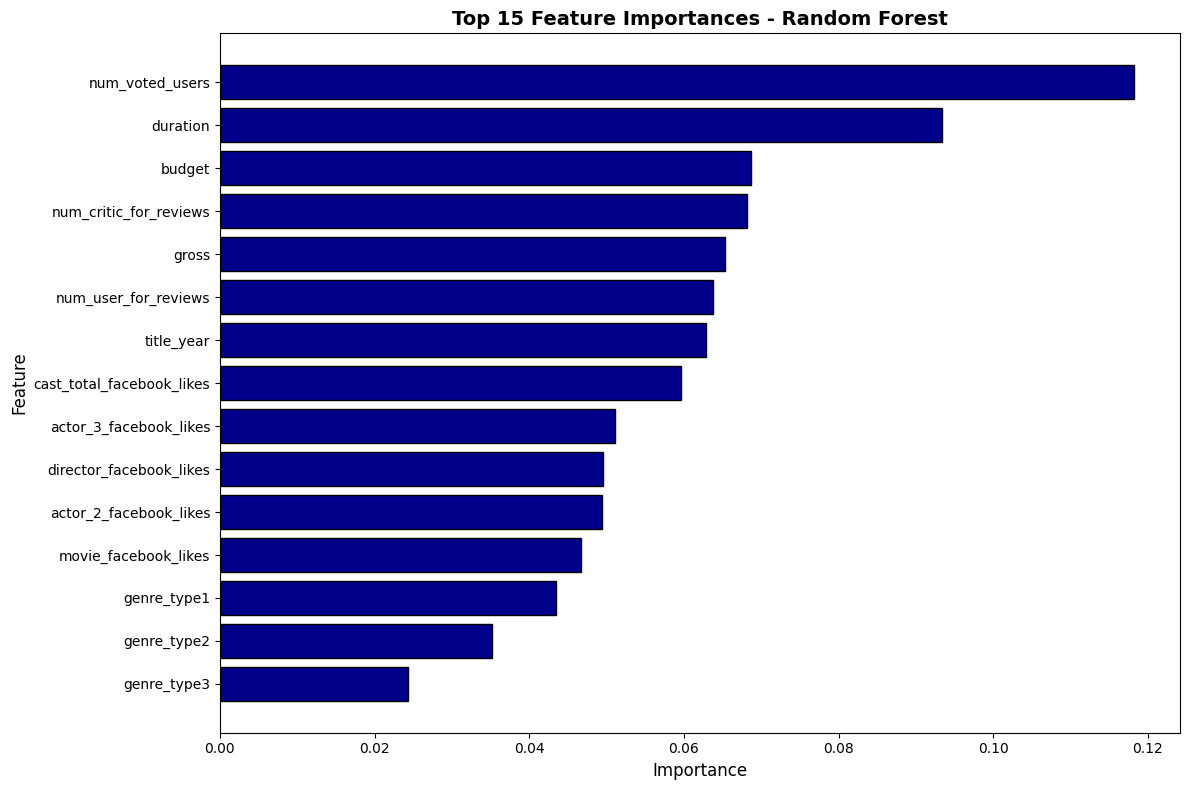

In [43]:
# Feature Importance from Random Forest
if hasattr(rfc_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rfc_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\nTop 20 Most Important Features (Random Forest):")
    print("="*80)
    print(feature_importance.head(20).to_string(index=False))
    
    # Visualize top 15 features
    plt.figure(figsize=(12, 8))
    top_15 = feature_importance.head(15)
    plt.barh(top_15['Feature'], top_15['Importance'], color='darkblue', edgecolor='black')
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.title('Top 15 Feature Importances - Random Forest', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

### Hyperparameter Tuning for Random Forest

In [44]:
# Define Hyperparameter grid
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [10,20,30,None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
    }

print("Performing Grid Search for Random Forest Hyperparameter Tuning....")
print("This may take several minutes...")

# Creating GridSearchCV object
rfc_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit grid search
rfc_grid_search.fit(X_train_scaled, y_train)

print("\nBest Parameters:")
print(rfc_grid_search.best_params_)
print(f"\nBest Cross-Validation Score: {rfc_grid_search.best_score_:.4f}")

# Evaluate tuned model on test set
tuned_rfc_pred = rfc_grid_search.best_estimator_.predict(X_test_scaled)
tuned_rfc_accuracy = accuracy_score(y_test, tuned_rfc_pred)

print(f"\nTuned Random Forest Test Accuracy: {tuned_rfc_accuracy:.4f}")

Performing Grid Search for Random Forest Hyperparameter Tuning....
This may take several minutes...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Best Cross-Validation Score: 0.8042

Tuned Random Forest Test Accuracy: 0.7701
